In [3]:
# Övning 1a) Create a DataFrame
import pandas as pd

data_cities = {
    'Kommun': ["Malmö", "Stockholm", "Uppsala", "Göteborg"],
    'Population': [347949, 975551, 233839, 583056]
}

cities = pd.DataFrame(data_cities)
cities


,Kommun,Population
0,Malmö,347949
1,Stockholm,975551
2,Uppsala,233839
3,Göteborg,583056


In [4]:
# Övning 1b) Select only one row

rad = cities.iloc[[3]]
rad


,Kommun,Population
3,Göteborg,583056


In [5]:
# Övning 1c) Sort the cities by population

sorted_cities = cities.sort_values("Population", ascending=False)

sorted_cities

,Kommun,Population
1,Stockholm,975551
3,Göteborg,583056
0,Malmö,347949
2,Uppsala,233839


In [6]:
# Övning 1d) Filter the three largest cities

large_cities = cities.nlargest(3, 'Population')

large_cities

,Kommun,Population
1,Stockholm,975551
3,Göteborg,583056
0,Malmö,347949


In [7]:
# Övning 1e) Create a new column in sorted DataFrame

total_population = 10379295
sorted_cities['Population (%)'] = round(sorted_cities['Population'] / total_population * 100, 1)

sorted_cities

,Kommun,Population,Population (%)
1,Stockholm,975551,9.4
3,Göteborg,583056,5.6
0,Malmö,347949,3.4
2,Uppsala,233839,2.3


In [8]:
# Övning 1a) Read in excel file into a DataFrame and explore the data.

file_path = '../../Data/komtopp50_2020.xlsx'
df = pd.read_excel(file_path, header=0, sheet_name='Totalt')

print(df.head()) # Visar de första 5 raderna i DataFrame för att ge en översikt över hur datan ser ut.
print(df.info()) # Ger en sammanfattning av DataFrame, inklusive kolumnnamn, datatyper och antalet icke-nollvärden i varje kolumn.
print(df.describe()) # Visar statistiska sammanfattningar som medelvärde, standardavvikelse, minsta och största värden för numeriska kolumner.


                                          Unnamed: 0  Unnamed: 1 Unnamed: 2  \
0                                                NaN         NaN        NaN   
1  Folkmängd per kommun 31 december 2020 jämfört ...         NaN        NaN   
2  Sorterat i alfabetisk ordning. Rangordning frå...         NaN        NaN   
3                                                NaN         NaN        NaN   
4                                               Rang         NaN     Kommun   

              Unnamed: 3  Unnamed: 4  Unnamed: 5  
0                    NaN         NaN         NaN  
1                    NaN         NaN         NaN  
2                    NaN         NaN         NaN  
3                    NaN         NaN         NaN  
4  Folkmängd 31 december         NaN  Förändring  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  294 non-null    

In [9]:
# Övning 2b) Clean your Data


df.columns = ['Rang 2020', 'Rang 2019', 'Kommun', 'Folkmängd 2020', 'Folkmängd 2019', 'Förändring']

df['Förändring'] = pd.to_numeric(df['Förändring'], errors='coerce')
df = df.dropna()
df['Folkmängd 2019'] = df['Folkmängd 2019'].astype(int)
df['Rang 2019'] = df['Rang 2019'].astype(int)

df.head().reset_index(drop=True)


,Rang 2020,Rang 2019,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring
0,83,84,Ale,31868,31402,1.483982
1,64,64,Alingsås,41602,41420,0.439401
2,123,123,Alvesta,20224,20134,0.447005
3,255,255,Aneby,6821,6848,-0.394276
4,169,167,Arboga,14039,14087,-0.340740


In [10]:
# Övning 2c) Sort the cities by population from largest to smallest

sorted_cities = df.sort_values('Folkmängd 2020', ascending=False)

sorted_cities.head().reset_index(drop=True)


,Rang 2020,Rang 2019,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring
0,1,1,Stockholm,975551,974073,0.151734
1,2,2,Göteborg,583056,579281,0.651670
2,3,3,Malmö,347949,344166,1.099179
3,4,4,Uppsala,233839,230767,1.331213
4,5,5,Linköping,164616,163051,0.959822


In [11]:
# Övning 2d) Filter out the five smallest cities.

df['Folkmängd 2020'] = pd.to_numeric(df['Folkmängd 2020'], errors='coerce')
smallest_cities = df.nsmallest(5, 'Folkmängd 2020')

smallest_cities


,Rang 2020,Rang 2019,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring
18,290,290,Bjurholm,2387,2408,-0.872093
200,289,289,Sorsele,2442,2489,-1.888309
35,288,288,Dorotea,2498,2551,-2.077617
11,287,287,Arjeplog,2718,2785,-2.405745
277,286,286,Åsele,2805,2794,0.393701


In [12]:
# Övning 2e) use DataFrame to calculate Sweden's Population in 2019 and 2020.

population_2019 = df["Folkmängd 2019"].sum()
population_2020 = df["Folkmängd 2020"].sum()

print(f"Sweden's population in 2019 is: {population_2019} and the population in 2020 are: {population_2020}.")


Sweden's population in 2019 is: 10327589 and the population in 2020 are: 10379295.


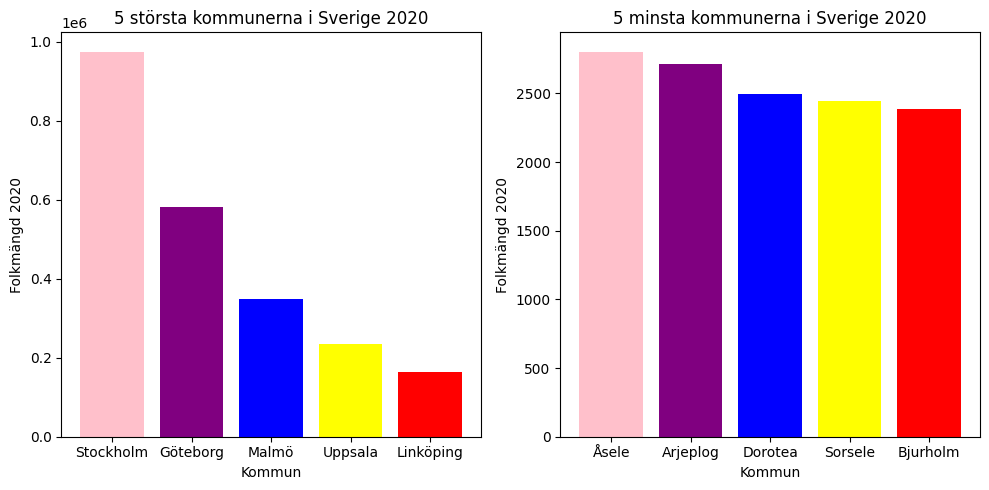

In [15]:
# Övning 2f) Plot a bar chart for the five largest cities and the five smallest cities.
import matplotlib.pyplot as plt

df_sorted = df.sort_values('Folkmängd 2020', ascending=False)

five_largest = df_sorted.head(5)
five_smallest = df_sorted.tail(5)

plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.bar(five_largest['Kommun'], five_largest['Folkmängd 2020'], color=['Pink', 'Purple', 'Blue', 'Yellow', 'red'])
plt.title("5 största kommunerna i Sverige 2020")
plt.xlabel('Kommun')
plt.ylabel('Folkmängd 2020')
plt.tight_layout()

plt.subplot(1, 2, 2)
plt.bar(five_smallest['Kommun'], five_smallest['Folkmängd 2020'], color=['Pink', 'Purple', 'Blue', 'Yellow', 'red'])
plt.title("5 minsta kommunerna i Sverige 2020")
plt.xlabel('Kommun')
plt.ylabel('Folkmängd 2020')
plt.tight_layout()
plt.show()
